### Text Classification

### Identify Sentiments

#### Problem Statement

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets <br>from customers
about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a  negative <br>sentiment towards such companies or products.

#### About Dataset

https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/#ProblemStatement

train.csv - For training the models, we provide a labelled dataset of 7920 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

test.csv - The test data file contains only tweet ids and the tweet text with each tweet in a new line.


#### Suitable Metric based on the problem and target

The metric used for evaluating the performance of classification model would be weighted F1-Score

#### Importing required packages

In [1]:
import pandas as pd
import numpy as np

#### Reading Data

In [2]:
train_data = pd.read_csv("Data/train_sent.csv")
test_data = pd.read_csv("Data/test_sent.csv")

In [3]:
train_data.shape

(7920, 3)

In [5]:
train_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [10]:
train_data.tweet[4]

"What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!"

In [12]:
train_data.tweet[20]

'#Apple #Art #Easter #Dear #Friends If you would like to be published on my channel. Design a face on the Easter Bunny and email it to me as a .png thumbnail. My email : mutita.edibleart@gmail.compic.twitter.com/7JhWphfbGT'

In [13]:
train_data.label[20]

0

In [14]:
train_data.tweet[0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
train_data.tweet[2]

'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu'

In [6]:
test_data.shape

(1953, 2)

In [7]:
test_data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [16]:
data = pd.concat([train_data,test_data],ignore_index=True)

In [17]:
data.shape

(9873, 3)

In [12]:
data.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [13]:
type(data['tweet'])

pandas.core.series.Series

#### Pre-processing the text data
- Removing weird spaces
- Tokenization
- Spelling correction
- Contraction mapping
- Stemming
- Emoji handling
- Stopwords handling
- Cleaning HTML

In [14]:
df = data.copy()

In [15]:
df['tweet'][:5]

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [23]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',             
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',            
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', ' while', 'of',           
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under' , 'again', 'further',           
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'e ach', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very',           
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll' , 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "do esn't", 'hadn',            
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",            
            "i'm",'won', "won't", 'wouldn', "wouldn't"]


In [24]:
import re
def preprocess_text(text):    
    # specific    
    text = re.sub(r"won't", "will not", text)    
    text = re.sub(r"can\'t", "can not", text)    
    # general    
    text = re.sub(r"n\'t", " not", text)    
    text = re.sub(r"\'re", " are", text)    
    text = re.sub(r"\'s", " is", text)    
    text = re.sub(r"\'d", " would", text)    
    text = re.sub(r"\'ll", " will", text)    
    text = re.sub(r"\'t", " not", text)    
    text = re.sub(r"\'ve", " have", text)    
    text = re.sub(r"\'m", " am", text)        
    text = text.replace('\\r', ' ')    
    text = text.replace('\\n', ' ')    
    text = text.replace('\\"', ' ')    
    #text = text.replace('!!!"', ' ')    
    text = re.sub('[^A-Za-z0-9]+', ' ', text)    
    # https://gist.github.com/sebleier/554280    
    text = text.lower().strip()    
    text = ' '.join(e for e in text.split() if e not in stopwords)    
    return text


In [25]:
text = df['tweet'][0]
text

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [26]:
preprocess_text(text)

'fingerprint pregnancy test https goo gl h1mfqv android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [27]:
df['tweet'] = df['tweet'].apply(preprocess_text)

In [28]:
df['tweet'][:5]

0    fingerprint pregnancy test https goo gl h1mfqv...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    wired know george made way iphone cute daventr...
4    amazing service apple not even talk question u...
Name: tweet, dtype: object

In [29]:
df['label'].value_counts(normalize=True)

0.0    0.744192
1.0    0.255808
Name: label, dtype: float64

In [31]:
df[:7920]

,id,label,tweet
0,1,0.0,fingerprint pregnancy test https goo gl h1mfqv...
1,2,0.0,finally transparant silicon case thanks uncle ...
2,3,0.0,love would go talk makememories unplug relax i...
3,4,0.0,wired know george made way iphone cute daventr...
4,5,1.0,amazing service apple not even talk question u...
...,...,...,...
7915,7916,0.0,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0.0,would like wish amazing day make every minute ...
7917,7918,0.0,helping lovely 90 year old neighbor ipad morni...
7918,7919,0.0,finally got smart pocket wifi stay connected a...


In [35]:
df[7920:]

,id,label,tweet
7920,7921,NaN,hate new iphone upgrade wo not let download ap...
7921,7922,NaN,currently shitting fucking pants apple imac ca...
7922,7923,NaN,would like puts cd roms ipad possible yes woul...
7923,7924,NaN,ipod officially dead lost pictures videos 1d 5...
7924,7925,NaN,fighting itunes night want music paid
...,...,...,...
9868,9869,NaN,samsunggalaxynote7 explodes burns 6 year old t...
9869,9870,NaN,available hoodie check http zetasupplies co uk...
9870,9871,NaN,goes crack right across screen could actually ...
9871,9872,NaN,codeofinterest said adobe big time may well in...


#### Train and Test split

In [34]:
train = df[:7920]
test = df[7920:]

In [36]:
y = df['label'][:7920]

In [73]:
y.value_counts(normalize=True)

0.0    0.744192
1.0    0.255808
Name: label, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6336, 3) (1584, 3) (6336,) (1584,)


#### Text Vectorization - BOW

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_bow = vect.fit_transform(x_train['tweet'])
train_bow.get_shape()

(6336, 19397)

In [52]:
test_bow = vect.transform(x_test['tweet'])
test_bow.get_shape()

(1584, 19397)

In [53]:
feature_names = vect.get_feature_names()
len(feature_names)

19397

In [54]:
vect.vocabulary_

{'apple': 1928,
 'evaded': 6002,
 'tax': 16605,
 'well': 18289,
 'another': 1861,
 'reason': 14217,
 'avoid': 2266,
 'horrendous': 8169,
 'company': 4445,
 'boring': 3306,
 'unimaginative': 17580,
 'products': 13664,
 'make': 10862,
 'iphone6': 9048,
 'hit': 8033,
 'face': 6153,
 'sue': 16274,
 'samsung': 14882,
 'copying': 4588,
 'poorchap': 13453,
 'sunset': 16335,
 'one': 12551,
 'minute': 11320,
 'ago': 1531,
 'world': 18567,
 'stormhour': 16151,
 'earthandclouds': 5678,
 'mooieluchten': 11515,
 'omroepzeeland': 12544,
 'seapic': 15098,
 'twitter': 17401,
 'com': 4406,
 'uhykm6j7py': 17503,
 'waiting': 18120,
 'patiently': 12941,
 'galaxysii': 7015,
 'white': 18375,
 'alas': 1619,
 'backordered': 2391,
 'tmobile': 17023,
 'yeah': 18940,
 'bb': 2549,
 'sucks': 16271,
 'iphone': 9033,
 'rt': 14706,
 'm0nstre': 10756,
 'love': 10609,
 'since': 15448,
 'yet': 18974,
 'send': 15167,
 'images': 8604,
 'without': 18484,
 'single': 15457,
 'issue': 9172,
 'reallyreal': 14211,
 'photobooth'

In [112]:
%%time 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score 
parameters = {'alpha':[0.001,0.01,0.1,1]} 
mnb = MultinomialNB()
gsearch_cv = GridSearchCV(estimator=mnb,param_grid = parameters, cv=10,scoring='f1') 
#running the grid search 
gsearch_cv.fit(train_bow,y_train) 
print('Best alpha in CV=%f' %gsearch_cv.best_params_['alpha']) 
f1_score = f1_score(gsearch_cv.best_estimator_.predict(test_bow),y_test) 
print('F1-score',f1_score)

Best alpha in CV=1.000000
F1-score 0.7903030303030304
Wall time: 332 ms


In [57]:
gsearch_cv.best_estimator_

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [59]:
from sklearn.metrics import precision_score, recall_score
print("precision",precision_score(y_test,gsearch_cv.best_estimator_.predict(test_bow)))
print("recall",recall_score(y_test,gsearch_cv.best_estimator_.predict(test_bow)))


precision 0.740909090909091
recall 0.8467532467532467


In [99]:
y_pred = gsearch_cv.best_estimator_.predict(test_bow)

In [100]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [66]:
labels_comparing = pd.DataFrame({'predicted_values':y_pred,'actual_values': y_test})

In [67]:
labels_comparing

,predicted_values,actual_values
1273,0.0,0.0
3252,1.0,0.0
5580,0.0,0.0
6916,0.0,0.0
6608,0.0,0.0
...,...,...
4775,0.0,0.0
7687,0.0,0.0
6191,0.0,0.0
4887,1.0,1.0


In [70]:
labels_comparing.loc[(labels_comparing['predicted_values']==1.0) & (labels_comparing['actual_values']==1.0)]

,predicted_values,actual_values
1524,1.0,1.0
4348,1.0,1.0
3388,1.0,1.0
27,1.0,1.0
2355,1.0,1.0
...,...,...
2806,1.0,1.0
2460,1.0,1.0
1545,1.0,1.0
3533,1.0,1.0


In [71]:
labels_comparing.loc[(labels_comparing['predicted_values']==0.0) & (labels_comparing['actual_values']==0.0)]

,predicted_values,actual_values
1273,0.0,0.0
5580,0.0,0.0
6916,0.0,0.0
6608,0.0,0.0
4706,0.0,0.0
...,...,...
4251,0.0,0.0
4775,0.0,0.0
7687,0.0,0.0
6191,0.0,0.0


In [75]:
labels_comparing['predicted_values'].value_counts(normalize=True)

0.0    0.722222
1.0    0.277778
Name: predicted_values, dtype: float64

In [133]:
from sklearn.neighbors import KNeighborsClassifier
d_test = {}
d_train = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_bow,y_train)
    y_train_pred = knn.predict(train_bow)
    y_pred = knn.predict(test_bow)
    d_test[i] = f1_score(y_pred,y_test)
    d_train[i] = f1_score(y_train_pred,y_train)

Text(0,0.5,'F1-Scores')

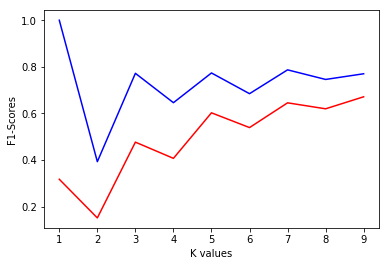

In [135]:
import matplotlib.pyplot as plt
plt.plot(list(d_train.keys()),list(d_train.values()),'b')
plt.plot(list(d_test.keys()),list(d_test.values()),'r')
plt.xlabel("K values")
plt.ylabel("F1-Scores")

In [142]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_bow,y_train)
y_pred = knn.predict(test_bow)

In [143]:
f1_score(y_pred,y_test)

0.6716049382716051

In [144]:
precision_score(y_pred,y_test)

0.7064935064935065

In [145]:
recall_score(y_pred,y_test)

0.64

In [146]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(train_bow,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
y_pred = lreg.predict(test_bow)

In [148]:
f1_score(y_pred,y_test)

0.7554417413572342

In [149]:
precision_score(y_pred,y_test)

0.7662337662337663

In [150]:
recall_score(y_pred,y_test)

0.7449494949494949

#### Text Vectorization - TF-IDF

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(x_train['tweet'])
train_tfidf.get_shape()

(6336, 19397)

In [78]:
test_tfidf = tfidf.transform(x_test['tweet'])
test_tfidf.get_shape()

(1584, 19397)

In [79]:
tfidf.get_feature_names()

['00',
 '000',
 '002',
 '004',
 '0051',
 '00am',
 '00pm',
 '01',
 '010111',
 '010315',
 '011',
 '01108nartl',
 '01204',
 '01924',
 '01am',
 '01amapril',
 '01amjune',
 '01ammay',
 '01pm',
 '01pmapril',
 '01pmjune',
 '01rcee',
 '02',
 '02pyow4aag',
 '03',
 '035glzwp4r',
 '04',
 '0490love',
 '05',
 '06',
 '07',
 '0716',
 '0777',
 '07yilmaz242',
 '08',
 '08184820028',
 '08t',
 '09',
 '0bao3i',
 '0bfnzanwty',
 '0d9dzq0cxo',
 '0dpfyzp4au',
 '0dythia5w0',
 '0ey7tmubxe',
 '0fcbzlaj9i',
 '0ffj5vnrfo',
 '0g',
 '0grfcyswij',
 '0k3k1wc8fk',
 '0k8h8yuufr',
 '0kvbf',
 '0livde',
 '0mjjnomhpy',
 '0mp',
 '0n',
 '0n4qiyjgye',
 '0n85j',
 '0oiou0ei5x',
 '0p48k68rac',
 '0psuz',
 '0pxdkdj',
 '0rx7h',
 '0ssqhh798x',
 '0sybds',
 '0v3in',
 '0vihbaapiq',
 '0vkcataugw',
 '0w8ubk',
 '0wautkfgi8',
 '0wqftykprt',
 '0x',
 '0y2zkgms2j',
 '0yfpeeslbg',
 '0yk3fbch0c',
 '10',
 '100',
 '1000',
 '10000',
 '100001472187182',
 '1002560005307076608',
 '100happyday',
 '100happydays',
 '100odd',
 '101',
 '102409',
 '1024688608

In [80]:
tfidf.idf_

array([7.45157566, 7.8082506 , 9.06101357, ..., 9.06101357, 9.06101357,
       9.06101357])

In [81]:
tfidf.idf_.shape

(19397,)

In [89]:
feature_idf_values = pd.Series(tfidf.idf_, tfidf.get_feature_names()).sort_values(ascending=False)

In [90]:
feature_idf_values

zznnb2inkt    9.061014
gt08          9.061014
gucci         9.061014
guardian      9.061014
guard         9.061014
                ...   
instagram     2.330592
apple         2.124185
com           1.909528
http          1.871846
iphone        1.818931
Length: 19397, dtype: float64

In [101]:
%%time 
#from sklearn.neighbors import KNeighborsClassifier

parameters = {'alpha':[0.001,0.01,0.1,1],lam=[0,0.1]} 
mnb = MultinomialNB()
gsearch_cv = GridSearchCV(estimator=mnb,param_grid = parameters, cv=10,scoring='f1') 
#running the grid search 
gsearch_cv.fit(train_tfidf,y_train) 

y_pred = gsearch_cv.best_estimator_.predict(test_tfidf)

Wall time: 300 ms


In [119]:
y_test = y_test.to_numpy()

In [124]:
y_test

array([0., 0., 0., ..., 0., 1., 0.])

In [122]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [106]:
labels_comparing = pd.DataFrame({'predicted_values':y_pred,'actual_values': y_test})

In [103]:
labels_comparing

,predicted_values,actual_values
1273,0.0,0.0
3252,1.0,0.0
5580,0.0,0.0
6916,0.0,0.0
6608,0.0,0.0
...,...,...
4775,0.0,0.0
7687,0.0,0.0
6191,0.0,0.0
4887,1.0,1.0


In [107]:
precision_score(y_pred,y_test)

0.8467532467532467

In [121]:
recall_score(y_pred,y_test)

0.7459954233409611

In [127]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test)

0.7931873479318734